# **SAAI** Overview | Background

The Summer School on Affordable AI **SAAI** is a project of the AGYA working group Innovation in close collaboration with the AGYA working group Health and Society. [The Arab-German Young Academy of Sciences and Humanities (AGYA)](https://agya.info/) is funded by the  [German Federal Ministry of Education and Research (BMBF)](https://www.bmbf.de/bmbf/en/home/home_node.html) and various Arab and German cooperation partners.
<img src="https://imgur.com/hMpk6HK.png" width="800">
<img src="https://imgur.com/b9n0Ow7.jpg" width="800">
<img src="https://imgur.com/EvXNz7j.jpg" width="800">
<img src="https://imgur.com/amMP7c7.jpg" width="800">

# **Clustering and Dimension Reduction (~ 75 min)**

<img src="https://imgur.com/SoVQEM3.png" width="800"/>

In this notebook, we will delve into and work with the sk-learn Wine dataset, a classic dataset frequently employed in the realm of machine learning for classification tasks. The Wine dataset comprises 178 samples, each characterized by 13 distinct features representing various chemical analyses of Italian wines originating from three different cultivars. These features encompass a range of chemical properties such as alcohol content, malic acid, ash, alkalinity of ash, magnesium, total phenols, flavonoids, nonflavonoid phenols, proanthocyanins, color intensity, hue, OD280/OD315 of diluted wines, and proline. The primary aim in this notebook is we go through the clustering and dimensionality reduction techniques.


Our first objective will be to learn how to effectively cluster the samples in this dataset using the K-means function. This technique will involve grouping the wine samples based on their chemical properties, aiming to identify inherent structures within the data. Following the clustering process, we will shift our attention to evaluating the performance of our clustering function. Finally, we will explore three different methods of dimensionality reduction. These techniques are instrumental in simplifying the complexity of our dataset while retaining as much of the significant information as possible. By applying these methods, we aim to gain a clearer, more accessible low-dimensional space visualization of the features within the Wine dataset. This step is essential for better understanding the relationships between different variables and for making our dataset more manageable for further analysis and interpretation.

## Importing necessary libraries and Loading Data (5 min):

1. Umap library is not pre-installed on your notebook. Install it with `!pip`.

2. Get to know the required libraries, and use an abreviation to further call them.

3. Load the dataset with help of the fucntion `load_wine()`. Determine the number of distinct classes included. To get an initial overview, use `df.columns` and `pd.head()` to display the feature names and the first 5 records of the dataset.

In [1]:
import warnings
# Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.2 MB/s eta 0:00:00


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

In [4]:
df = load_wine(as_frame=True)
df = df.frame
# print the shape of the dataset, the list of columns name, and the first 5 rows of dataset
print(df.shape)
print(list(df.columns))
df.head()

(178, 14)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'target']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Data Standardization (5 min):

In data science, "standardization" and "normalization" are two common techniques used to prepare data for machine learning algorithms. These techniques are crucial for models that are sensitive to the scale and distribution of data.

Standardization refers to transforming each feature to have a mean of zero and a standard deviation of one. This process is also known as Z-score normalization. The formula for standardizing a feature is: $z = \frac{x - \mu}{\sigma}$

Standardization does not bound values to a specific range. It's useful when you want to compare features that have different units or scales. Essential for algorithms that assume data is normally distributed and for methods that are sensitive to the scale of input features (e.g., PCA, SVM).

Normalization, on the other hand, typically refers to scaling individual samples to have unit norm length. It's more about altering the scale of the data without changing its distribution. The most common norms used are the L1 norm (also known as Manhattan distance) and the L2 norm (Euclidean distance): $x_{\text{norm}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}$



Read more here:

https://developers.google.com/machine-learning/data-prep/transform/normalization

The `StandardScaler().fit_transform(df)` method from the scikit-learn library ensurs that each feature contributes equally to the analysis. This method standardizes the features by removing the mean and scaling to unit variance, which is crucial in algorithms like K-means that are sensitive to the scale of the data. By applying this transformation, it helps in improving the performance and accuracy of machine learning models, as they are not biased or skewed by the natural variance in the dataset.

1. Standardize data faetures with sk-learn functions `StandardScaler().fit_transform(df)`.

2. print out the first 5 rows of data and compare them with the data before the standardization

In [5]:
df_features = df.drop(['target'], axis=1)

scaler = StandardScaler()
features = scaler.fit(df_features)
features = features.transform(df_features)
# 3 lines of code in 1 line:
# features = StandardScaler().fit_transform(df_features)

# Convert to pandas Dataframe
# you may want to repeat the visualizaton again this time without the standardization
scaled_df = pd.DataFrame(df_features, columns=df.columns[:-1])  # without
scaled_df = pd.DataFrame(features, columns=df.columns[:-1])     # with

# Print the scaled data
scaled_df.head(5)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## K-mean and Elbow Method (10 min)

Plotting the elbow curve for K-means clustering is essential to determine the optimal number of clusters (k) for the dataset. The curve, which plots the number of clusters against a measure of cluster quality (like WCSS: Within-Cluster Sum of Squares, or NMI: Normalized Mutual Information), typically shows a point where the rate of decrease sharply changes, known as the 'elbow'. This point signifies where adding more clusters does not significantly improve the clustering quality, thus providing a balance between the complexity of the model and the adequacy of the cluster representation.


WCSS (Within-Cluster Sum of Squares) and NMI (Normalized Mutual Information) are two metrics commonly used in the context of clustering, a form of unsupervised learning in data science. Let's delve into what each of these metrics represents:

> WCSS (Within-Cluster Sum of Squares)
WCSS is a metric used to evaluate the performance of a clustering algorithm, most commonly k-means. It measures the sum of squared distances between each point in a cluster and the centroid of that cluster. The formula for WCSS is: $\text{WCSS} = \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2$

$k$ is the number of clusters. $C_i$ represents the set of points in the $i$-th cluster. $x$ is a point in cluster $C_i$. $\mu_i$ is the centroid of cluster $C_i$. $\| x - \mu_i \|^2$ is the squared Euclidean distance between point $x$ and centroid $\mu_i$.

The goal in k-means is to minimize the WCSS, as a lower WCSS indicates that the points within each cluster are closer to their respective centroids, implying better compactness and separation of the clusters.

> NMI (Normalized Mutual Information)
NMI is a measure used for evaluating the quality of clustering, particularly in scenarios where the true labels are known. It is based on mutual information (MI), which measures the amount of information obtained about one random variable by observing another random variable. NMI normalizes this value to account for the size of the clusters and the distribution of the ground truth labels. The formula for NMI is: $\text{NMI}(U, V) = \frac{2 \times \text{I}(U; V)}{H(U) + H(V)}$

$U$ is the set of true class labels. $V$ is the set of cluster labels produced by the clustering algorithm. $\text{I}(U; V)$ is the mutual information between $U$ and $V$. $H(U)$ and $H(V)$ are the entropies of $U$ and $V$, respectively.

Read more here:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html


NMI values range from 0 to 1, where 1 indicates perfect clustering (i.e., the clustering algorithm perfectly predicts the true labels), and 0 indicates that the clustering is no better than random chance. NMI is particularly useful in comparing the performance of different clustering algorithms or the same algorithm with different parameters. Follow the steps bellow to complete evaluaitons:



1. For num of clusters 1 to 10, plot the elbow curve for kmeans clustering, and choosing a final num of cluster
2. Evaluate your kmeans with `kmeans.inertia_`. Make WCSS (Within-Cluster Sum of Squares): a dictionary to store the values for each num of clusters k
3. Use NMI `normalized_mutual_info_score()` to again evaluate your k-means. Explain what WCSS and NMI are.

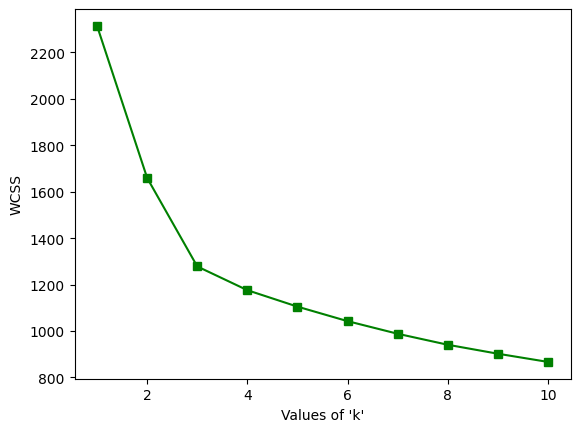

(3, 13)
[[ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [-0.92607185 -0.39404154 -0.49451676  0.17060184 -0.49171185 -0.07598265
   0.02081257 -0.03353357  0.0582655  -0.90191402  0.46180361  0.27076419
  -0.75384618]
 [ 0.83523208 -0.30380968  0.36470604 -0.61019129  0.5775868   0.88523736
   0.97781956 -0.56208965  0.58028658  0.17106348  0.47398365  0.77924711
   1.12518529]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 2 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [6]:
# for num of clusters 1 to 10, plot the elbow curve
X = scaled_df.values
# WCSS (Within-Cluster Sum of Squares): a dictionary to store the values for each num of clusters k
wcss = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss[i] = kmeans.inertia_


plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

# according to the plot, choose the suitable number of clusters and fit the model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print(kmeans.cluster_centers_.shape) # (3, 13)
print(kmeans.cluster_centers_) # 3 clusters, 13 features
print(kmeans.labels_) # 178 samples, each sample belongs to one of the 3 clusters

In [7]:
# Evaluate your Kmeans
# get assigned labels and for input to the kmeans algorithm
labels = kmeans.labels_
true_labels = df.target.values
kmeans_labels = labels
nmi_score = normalized_mutual_info_score(true_labels, kmeans_labels)
print("NMI Score: ", nmi_score)

NMI Score:  0.8758935341223069


## Dimension Reduction (10 min)


Dimensionality reduction of data features is a critical process in data analysis and machine learning, particularly when dealing with high-dimensional datasets. Here's why it's important and the differences between PCA, t-SNE, and UMAP:
Importance of Dimensionality Reduction:
- Reduces Computational Complexity: By lowering the number of features, it makes algorithms faster and less computationally expensive.
- Mitigates the Curse of Dimensionality: High-dimensional spaces often lead to issues like overfitting and sparsity of data; reducing dimensions can alleviate these problems.
- Finally, improves Data Visualization: It's easier to visualize and interpret data in two or three dimensions than in higher-dimensional spaces.

PCA (Principal Component Analysis):

Linear Technique: PCA is a linear algorithm that identifies the directions (principal components) in which the data varies most.
Global Structure Preservation: It's effective in preserving the global structure of the data but might not capture complex, nonlinear relationships.
Scalability and Interpretability: PCA scales well with large datasets and the components can often be interpreted in terms of the original features.

Read more here:
https://www.youtube.com/watch?v=HMOI_lkzW08


Follow the steps bellow to compelete tasks:

1. Reduce the dimension of the features to 2 with the imported PCA funciton `PCA()`
2. Visualize the samples in 2D together with the centroids that have been created by Kmean with 3 clusters. Remember you need to reduce the features of centroids as well to be able to visualize them in 2D.

       PCA1      PCA2
0  3.316751 -1.443463
1  2.209465  0.333393
2  2.516740 -1.031151
3  3.757066 -2.756372
4  1.008908 -0.869831


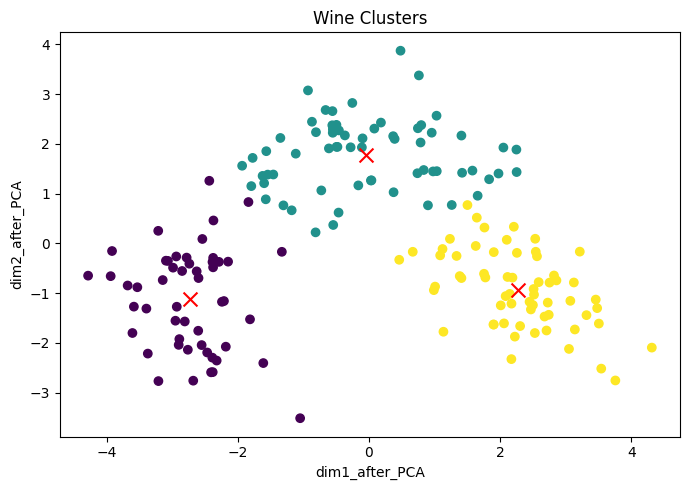

In [8]:
pca = PCA(n_components=2)
reduced_X = pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])
print(reduced_X.head())
# reduced centers features after PCA
centers = pca.transform(kmeans.cluster_centers_)
centers


# Scatter plot of the reduced data
plt.figure(figsize=(7,5))
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('dim1_after_PCA')
plt.ylabel('dim2_after_PCA')
plt.title('Wine Clusters')
plt.tight_layout()

## Transforming Features of one Sample to Low-dimension Space: 15 min

This exercise aims to familiarize you with the process of transforming a high-dimensional data sample into a lower-dimensional space using PCA. You will be working with a sample containing 13 features, projecting it to a 2D space.



To project a sample from a 13-dimensional space to a 2-dimensional space using a transformation matrix, you typically employ a method like Principal Component Analysis (PCA). Here's a simplified overview of the mathematics behind this process:

1. **PCA Transformation Matrix:**
   - PCA begins by calculating the eigenvectors and eigenvalues from the covariance matrix of the data. These eigenvectors are the principal components.
   - In this case, to project down to 2D, you select the first two principal components.
   - Let's say your PCA transformation matrix \( T \) is composed of these two principal components, each being a 13-dimensional vector. So, \( T \) will be a matrix of size \( 2 \times 13 \).

2. **Sample in 13-Dimensional Space:**
   - Assume your sample in the 13-dimensional space is a vector \( X \) of size \( 13 \times 1 \).

3. **Projection to 2D:**
   - The projection of \( X \) into the new 2D space is achieved by multiplying the transformation matrix \( T \) with the sample vector \( X \).
   - Mathematically, it's represented as \( Y = TX \), where \( Y \) is your new 2-dimensional representation of the sample.
   - In terms of matrix dimensions, it looks like \( (2 \times 13) \times (13 \times 1) = (2 \times 1) \). So, \( Y \) is a 2-dimensional vector.

4. **Matrix Multiplication:**
   - The actual computation involves the dot product between each row of \( T \) and \( X \). Each element of \( Y \) is a sum of the products of corresponding elements from the row of \( T \) and \( X \).

5. **Result:**
   - The resulting 2D vector \( Y \) represents your original 13-dimensional sample projected onto the space defined by the first two principal components. This 2D representation captures the most significant variance of the original data in two dimensions.

This process effectively reduces the dimensionality of the data while retaining the most critical information, as captured by the first two principal components. Now follow the steps bellow for the implementation details:

1. Choose a random sample form the dataset.
2. Use `pca.transform` to transform the 13 features of that sample to 2D.
3. Plot a heatmap of the transform matrix `pca.components`.  
4. Considering the transform matrix `pca.components` and the dot product function `np.dot` try to find the sample projection in 2D.

(2, 13)


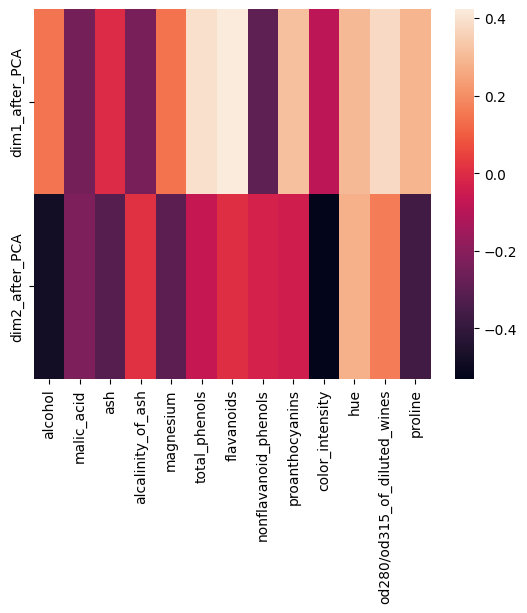

----
transfer with function  :  [[0.18338403 2.42714611]]
transfer with dotProduct:  [[0.18338403 2.42714611]]


In [9]:
# Heat map c
print(pca.components_.shape)
component_df = pd.DataFrame(pca.components_, index=['dim1_after_PCA', 'dim2_after_PCA'], columns=df.columns[:-1])
sns.heatmap(component_df)
plt.show()

# use the PCA transfer matrix to transform the sample to low-dim space
sample = scaled_df.sample(1)
pca_transfer_Matrix = pca.components_.T
sample_2component = np.dot(sample.values, pca_transfer_Matrix)
sample_transformed = pca.transform(sample.values)

print('----')
print('transfer with function  : ', sample_2component)
print('transfer with dotProduct: ', sample_transformed)

## Dimension Reduction with PCA: (5 min)
1. Repeat the reduciton of feature dimension this time to 3. Again using the the imported PCA funciton `PCA()`
2. Visualize the 3D components of samples.
3. Also use the interactive visualization library.

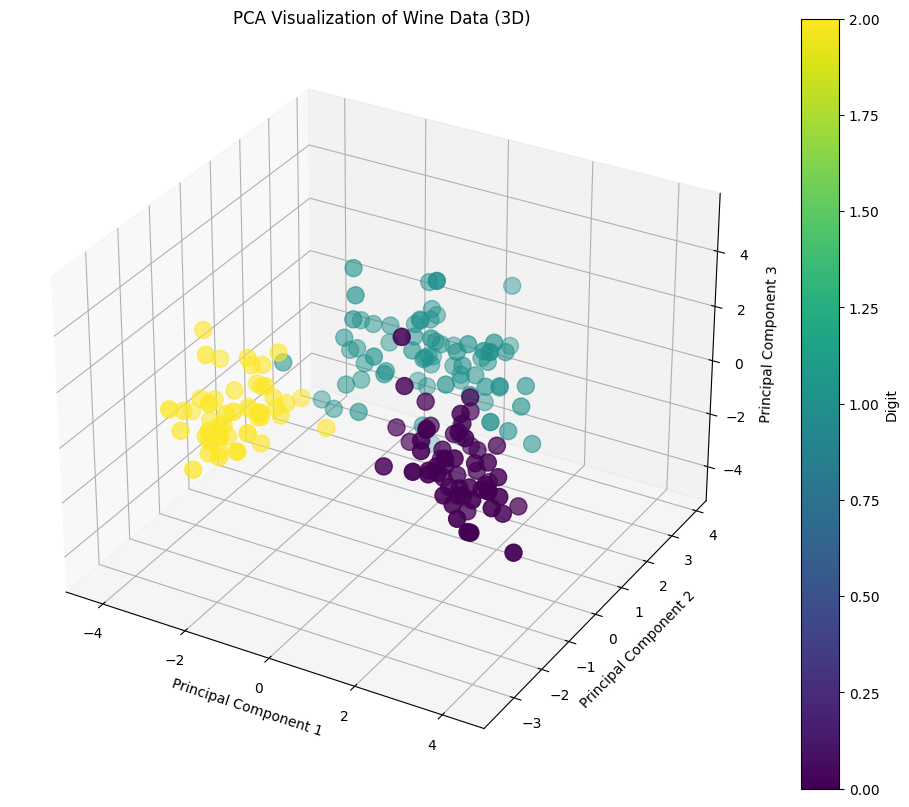

In [10]:
# Perform PCA for visualization with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Plot the first three principal components in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
# c = target column in the dataset (0-9)  .astype('float'),

# in the scatter plot bellow, GIVE EACH SAMPLE A COLOR ACCORDING TO ITS TARGET VALUE
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df.target, cmap='viridis', s=150)


plt.colorbar(scatter, label='Digit')
ax.set_title('PCA Visualization of Wine Data (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

fig = px.scatter_3d(X_pca, x=0, y=1, z=2, title='3D vis of PCA', color=df.target)
fig.show()

## t-SNE : t-Distributed Stochastic Neighbor Embedding (7 min):

Non-Linear Technique: t-SNE is a nonlinear, probabilistic technique primarily used for visualizing high-dimensional data in 2D or 3D.
Local Structure Preservation: It excels at revealing the local structure and clustering in data, often at the cost of global structure.
Computational Complexity: t-SNE can be computationally intensive, especially on large datasets, and its results can vary based on the chosen parameters.

1. Reduce the dimension of the features to 2 with the imported `TSNE()` funciton
2. Visualize the samples in 2D.

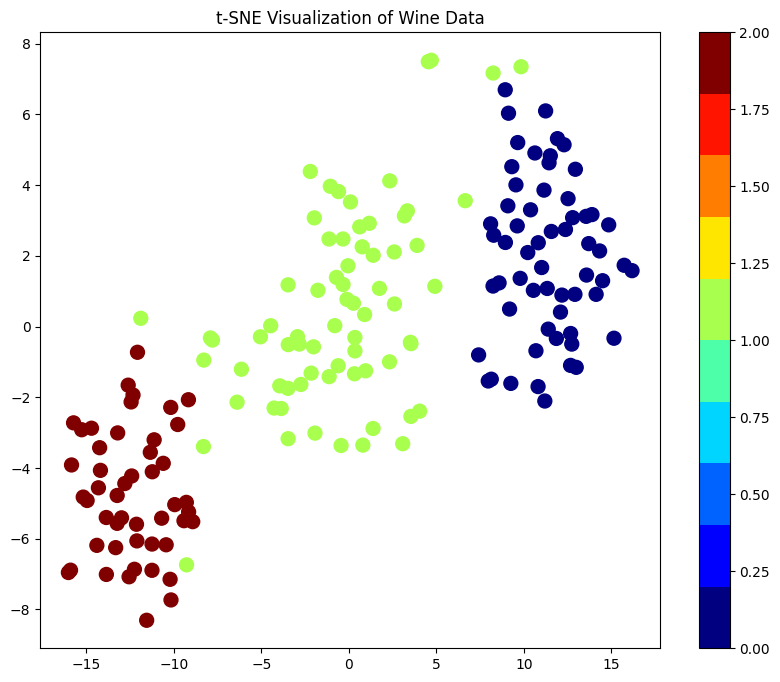

In [11]:
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualize the results
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df.target, cmap=plt.get_cmap('jet', 10), marker='o', s=100)
plt.colorbar()
plt.title('t-SNE Visualization of Wine Data')
plt.show()


## UMAP : Uniform Manifold Approximation and Projection (8 min):

Non-Linear Technique: Like t-SNE, UMAP is a nonlinear method, but it's based on manifold learning with superior scalability. Balance Between Local and Global Structure: UMAP preserves more of the global structure than t-SNE, while also unfolding local structures. Versatility and Speed: It works faster than t-SNE on large datasets and can be applied more broadly, including in tasks beyond visualization, like supervised dimensionality reduction.

1. Reduce the dimension of the features to 2 with the imported `umap.UMAP()` funciton
2. Visualize the samples in 2D.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



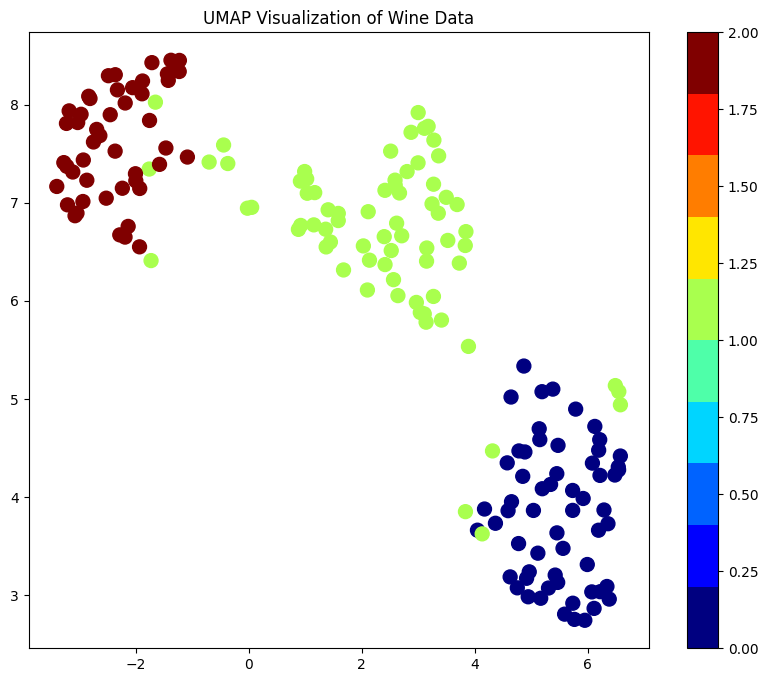

In [12]:
# Perform UMAP dimensionality reduction
reducer = umap.UMAP(n_components=2, random_state=42)
embedding = reducer.fit_transform(X)

# Visualize the results
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=df.target, cmap=plt.get_cmap('jet', 10), marker='o', s=100)
plt.colorbar()
plt.title('UMAP Visualization of Wine Data')
plt.show()

## PCA, t-SNE, Umap
Each of these methods has its strengths and is suited to different types of datasets and analysis goals. PCA is often the first choice for linear dimensionality reduction and overview analysis, while t-SNE and UMAP are more suited for detailed exploratory analysis, especially when the data has complex, nonlinear relationships.